In [1]:
import pandas as pd

In [35]:
df1 = pd.read_csv('./등표기상관측_순서정리/2012.csv') #2012, 2015, 2018, 2021
df2 = pd.read_csv('./기상특보_W_REPORT_2011_2022/W_REPORT_2012_yame.csv')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6370 entries, 0 to 6369
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          6370 non-null   object 
 1   WIND_SPEED  6370 non-null   float64
 2   GUST_WIND   6370 non-null   float64
 3   SIG_WAVE    6370 non-null   float64
 4   MAX_WAVE    6370 non-null   float64
 5   HPA         6370 non-null   float64
dtypes: float64(5), object(1)
memory usage: 298.7+ KB


In [17]:
df2

,일시,특보강도
0,2012-01-04 12:00:00,1
1,2012-01-05 02:30:00,1
2,2012-01-05 03:30:00,0
3,2012-01-19 19:00:00,1
4,2012-01-21 08:00:00,1
...,...,...
203,2013-12-19 00:00:00,1
204,2013-12-19 01:00:00,0
205,2013-12-19 20:00:00,1
206,2013-12-21 17:00:00,1


In [36]:
df = pd.merge(df1,df2,how='outer',on='일시')

In [37]:
df

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
0,2012-03-29 12:00:00,4.1,8.0,0.2,0.4,1023.9,NaN
1,2012-03-29 13:00:00,4.7,8.4,0.2,0.4,1023.0,NaN
2,2012-03-29 14:00:00,6.0,11.4,0.2,0.4,1022.3,NaN
3,2012-03-29 15:00:00,6.1,11.9,0.2,0.3,1021.4,NaN
4,2012-03-29 16:00:00,7.0,12.5,0.2,0.3,1020.9,NaN
...,...,...,...,...,...,...,...
6480,2013-12-19 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0
6481,2013-12-19 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0
6482,2013-12-19 20:00:00,NaN,NaN,NaN,NaN,NaN,1.0
6483,2013-12-21 17:00:00,NaN,NaN,NaN,NaN,NaN,1.0


In [38]:
df.loc[0,'특보강도'] = 0

In [39]:
df['특보강도'].fillna(method='ffill',inplace=True)

In [40]:
df

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
0,2012-03-29 12:00:00,4.1,8.0,0.2,0.4,1023.9,0.0
1,2012-03-29 13:00:00,4.7,8.4,0.2,0.4,1023.0,0.0
2,2012-03-29 14:00:00,6.0,11.4,0.2,0.4,1022.3,0.0
3,2012-03-29 15:00:00,6.1,11.9,0.2,0.3,1021.4,0.0
4,2012-03-29 16:00:00,7.0,12.5,0.2,0.3,1020.9,0.0
...,...,...,...,...,...,...,...
6480,2013-12-19 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0
6481,2013-12-19 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0
6482,2013-12-19 20:00:00,NaN,NaN,NaN,NaN,NaN,1.0
6483,2013-12-21 17:00:00,NaN,NaN,NaN,NaN,NaN,1.0


In [43]:
df.dropna(inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6370 entries, 0 to 6369
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          6370 non-null   object 
 1   WIND_SPEED  6370 non-null   float64
 2   GUST_WIND   6370 non-null   float64
 3   SIG_WAVE    6370 non-null   float64
 4   MAX_WAVE    6370 non-null   float64
 5   HPA         6370 non-null   float64
 6   특보강도        6370 non-null   float64
dtypes: float64(6), object(1)
memory usage: 398.1+ KB


## 종합코드

In [137]:
import pandas as pd

df1 = pd.read_csv('./등표기상관측_순서정리/2020.csv') #2012, 2015, 2018, 2021
df2 = pd.read_csv('./기상특보_W_REPORT_2011_2022/W_REPORT_2020_yame.csv')

df = pd.merge(df1,df2,how='outer',on='일시')

df.loc[0,'특보강도'] = 0 # 1월 1일 특보 데이터가 NaN일때만 실행

df['특보강도'].fillna(method='ffill',inplace=True)

df.dropna(inplace=True)

df.set_index('일시', inplace=True)

df.to_csv('./최종데이터셋/2020.csv')

In [3]:
import pandas as pd

In [30]:
df = pd.read_csv('./최종데이터셋/2018.csv',index_col=0)
df.tail()

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
일시,,,,,,
2018-10-06 06:00:00,13.6,22.6,2.9,4.1,998.4,4.0
2018-10-06 07:00:00,14.5,22.6,3.3,4.7,996.3,4.0
2018-10-06 08:00:00,17.7,23.9,4.7,6.7,993.3,4.0
2018-10-06 09:00:00,16.8,24.1,3.6,5.1,990.2,4.0
2018-10-06 10:00:00,25.4,35.6,5.6,7.8,986.6,4.0


In [35]:
df[df['특보강도'] == 1].head(5).describe()

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,11.140000,17.120000,1.140000,1.740000,1001.700000,1.0
std,1.344619,2.835842,0.296648,0.391152,4.103657,0.0
min,9.600000,12.700000,0.700000,1.200000,997.100000,1.0
25%,10.000000,15.900000,1.000000,1.500000,999.400000,1.0
50%,11.200000,18.400000,1.200000,1.800000,1000.200000,1.0
75%,12.200000,19.300000,1.400000,2.100000,1004.600000,1.0
max,12.700000,19.300000,1.400000,2.100000,1007.200000,1.0


In [36]:
df[df['특보강도'] == 3].head(5).describe()

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,11.300000,17.720000,1.120000,1.640000,996.680000,3.0
std,2.421776,1.813009,0.148324,0.219089,3.471599,0.0
min,7.100000,14.500000,0.900000,1.300000,991.100000,3.0
25%,11.800000,18.400000,1.100000,1.600000,996.000000,3.0
50%,11.900000,18.400000,1.100000,1.700000,997.300000,3.0
75%,12.400000,18.400000,1.200000,1.700000,999.100000,3.0
max,13.300000,18.900000,1.300000,1.900000,999.900000,3.0


In [32]:
df[df['특보강도'] == 2].head(5)

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
일시,,,,,,
2018-03-05 18:00:00,6.9,21.3,2.0,2.9,1020.5,2.0
2018-03-05 19:00:00,7.1,21.3,1.6,2.2,1022.3,2.0
2018-03-05 20:00:00,7.1,21.3,1.7,2.4,1022.9,2.0
2018-03-05 21:00:00,5.3,21.3,2.0,2.8,1023.6,2.0
2018-03-05 22:00:00,5.2,21.3,2.0,2.8,1023.3,2.0


In [33]:
df[df['특보강도'] == 3].head(5)

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
일시,,,,,,
2018-07-03 11:00:00,12.4,18.4,0.9,1.3,999.9,3.0
2018-07-03 12:00:00,13.3,18.4,1.1,1.6,999.1,3.0
2018-07-03 13:00:00,11.9,18.4,1.1,1.7,997.3,3.0
2018-07-03 14:00:00,11.8,18.9,1.2,1.7,996.0,3.0
2018-07-04 02:00:00,7.1,14.5,1.3,1.9,991.1,3.0


In [26]:
df[df['특보강도'] == 4].head(5)

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
일시,,,,,,
2015-08-25 09:00:00,15.1,28.4,1.6,2.3,990.6,4.0
2015-08-25 10:00:00,12.6,28.4,1.8,2.6,990.9,4.0
2015-08-25 11:00:00,11.4,28.4,1.9,2.7,991.4,4.0
2015-08-25 12:00:00,9.6,28.4,2.0,2.9,991.1,4.0
2015-08-25 13:00:00,9.9,28.4,2.9,4.1,989.8,4.0


In [8]:
df[df['특보강도'] == 0].describe()

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
count,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,4973.0
mean,4.340499,9.591233,0.380575,0.602594,1011.924472,0.0
std,2.248220,3.945029,0.233852,0.343868,6.125374,0.0
min,0.100000,0.700000,0.000000,0.100000,997.700000,0.0
25%,2.700000,6.400000,0.200000,0.400000,1007.400000,0.0
50%,4.200000,9.500000,0.300000,0.500000,1011.300000,0.0
75%,5.800000,12.200000,0.500000,0.700000,1016.300000,0.0
max,12.400000,24.200000,2.300000,3.300000,1027.200000,0.0


In [116]:
df[df['특보강도'] == 1].describe()

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
count,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.0
mean,5.562769,12.954256,0.570335,0.872829,1016.266638,1.0
std,2.539353,4.542186,0.418162,0.622679,6.754302,0.0
min,0.100000,3.300000,0.100000,0.100000,996.100000,1.0
25%,3.900000,9.600000,0.300000,0.400000,1011.900000,1.0
50%,5.200000,12.400000,0.400000,0.700000,1016.600000,1.0
75%,7.100000,16.350000,0.800000,1.200000,1021.000000,1.0
max,15.000000,31.300000,2.800000,4.000000,1031.900000,1.0


In [117]:
df[df['특보강도'] == 2].describe()

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,10.976190,21.223810,1.085714,1.614286,999.261905,2.0
std,2.608813,3.013454,0.375880,0.560612,7.030894,0.0
min,5.400000,17.100000,0.500000,0.800000,990.100000,2.0
25%,8.800000,17.600000,0.900000,1.300000,992.800000,2.0
50%,11.200000,23.500000,1.000000,1.400000,998.600000,2.0
75%,13.200000,23.500000,1.400000,2.000000,1005.500000,2.0
max,15.500000,23.500000,1.800000,2.700000,1011.500000,2.0


In [118]:
df[df['특보강도'] == 3].describe()

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
mean,6.676000,12.648000,0.980000,1.480000,1007.640000,3.0
std,2.810291,3.926844,0.217945,0.314907,2.469143,0.0
min,1.200000,5.000000,0.600000,1.000000,1001.200000,3.0
25%,5.000000,9.700000,0.800000,1.200000,1007.300000,3.0
50%,6.600000,13.700000,1.000000,1.500000,1008.400000,3.0
75%,9.100000,14.100000,1.100000,1.600000,1009.100000,3.0
max,10.400000,22.000000,1.500000,2.200000,1010.500000,3.0


In [119]:
df[df['특보강도'] == 4].describe()

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.0
mean,13.614545,23.101818,2.387273,3.525455,1000.127273,4.0
std,3.201008,5.349749,1.146016,1.644994,6.151677,0.0
min,7.300000,14.400000,0.700000,1.000000,987.200000,4.0
25%,11.150000,18.600000,1.400000,2.100000,995.200000,4.0
50%,13.400000,23.400000,2.300000,3.300000,1001.700000,4.0
75%,15.750000,26.700000,3.200000,4.650000,1004.300000,4.0
max,20.000000,31.300000,4.800000,7.000000,1008.200000,4.0


In [3]:
import pandas as pd

In [38]:
df1 = pd.read_csv('./최종데이터셋/2011.csv')
df2 = pd.read_csv('./최종데이터셋/2012.csv')
df3 = pd.read_csv('./최종데이터셋/2013.csv')
df4 = pd.read_csv('./최종데이터셋/2014.csv')
df5 = pd.read_csv('./최종데이터셋/2015.csv')
df6 = pd.read_csv('./최종데이터셋/2016.csv')
df7 = pd.read_csv('./최종데이터셋/2017.csv')
df8 = pd.read_csv('./최종데이터셋/2018.csv')
df9 = pd.read_csv('./2019_2021/2019_GEOJE.csv')
df10 = pd.read_csv('./2019_2021/2020_GEOJE.csv')
df11 = pd.read_csv('./2019_2021/2021_GEOJE.csv')

In [6]:
df1

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
0,2011-03-04 17:00:00,2.8,8.9,0.3,0.5,1021.0,0.0
1,2011-03-04 18:00:00,3.4,8.9,0.3,0.4,1021.7,0.0
2,2011-03-04 19:00:00,4.5,8.9,0.3,0.4,1022.2,0.0
3,2011-03-04 20:00:00,2.9,8.9,0.3,0.5,1022.6,0.0
4,2011-03-04 21:00:00,3.8,8.9,0.3,0.5,1023.1,0.0
...,...,...,...,...,...,...,...
5587,2011-10-25 04:00:00,5.1,11.2,0.2,0.3,1015.9,0.0
5588,2011-10-25 05:00:00,6.4,11.2,0.2,0.3,1016.8,0.0
5589,2011-10-25 06:00:00,6.7,11.2,0.1,0.2,1017.5,0.0
5590,2011-10-25 07:00:00,4.4,11.2,0.2,0.3,1018.4,0.0


In [5]:
df2

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
0,2012-03-29 12:00:00,4.1,8.0,0.2,0.4,1023.9,0.0
1,2012-03-29 13:00:00,4.7,8.4,0.2,0.4,1023.0,0.0
2,2012-03-29 14:00:00,6.0,11.4,0.2,0.4,1022.3,0.0
3,2012-03-29 15:00:00,6.1,11.9,0.2,0.3,1021.4,0.0
4,2012-03-29 16:00:00,7.0,12.5,0.2,0.3,1020.9,0.0
...,...,...,...,...,...,...,...
6365,2012-12-31 19:00:00,3.3,11.5,0.2,0.4,1020.2,0.0
6366,2012-12-31 20:00:00,3.6,11.5,0.2,0.4,1020.5,0.0
6367,2012-12-31 21:00:00,2.2,11.5,0.2,0.4,1021.0,0.0
6368,2012-12-31 22:00:00,3.8,11.5,0.4,0.5,1021.1,0.0


In [39]:
# df = pd.merge(df1,df2,how='outer')
df = pd.merge(df2,df3,how='outer')
df = pd.merge(df,df4,how='outer')
df = pd.merge(df,df5,how='outer')
df = pd.merge(df,df6,how='outer')
df = pd.merge(df,df7,how='outer')
df = pd.merge(df,df8,how='outer')
df = pd.merge(df,df9,how='outer')
df = pd.merge(df,df10,how='outer')
df = pd.merge(df,df11,how='outer')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78781 entries, 0 to 78780
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          78781 non-null  object 
 1   WIND_SPEED  78781 non-null  float64
 2   GUST_WIND   78781 non-null  float64
 3   SIG_WAVE    78781 non-null  float64
 4   MAX_WAVE    78781 non-null  float64
 5   HPA         78781 non-null  float64
 6   특보강도        78781 non-null  float64
dtypes: float64(6), object(1)
memory usage: 4.8+ MB


In [40]:
df['일시'] = pd.to_datetime(df['일시'])
df.set_index('일시',inplace=True)

In [7]:
df

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
일시,,,,,,
2012-03-29 12:00:00,4.1,8.0,0.2,0.4,1023.9,0.0
2012-03-29 13:00:00,4.7,8.4,0.2,0.4,1023.0,0.0
2012-03-29 14:00:00,6.0,11.4,0.2,0.4,1022.3,0.0
2012-03-29 15:00:00,6.1,11.9,0.2,0.3,1021.4,0.0
2012-03-29 16:00:00,7.0,12.5,0.2,0.3,1020.9,0.0
...,...,...,...,...,...,...
2021-12-30 20:00:00,8.0,11.2,1.2,1.9,1022.9,0.0
2021-12-30 21:00:00,9.2,12.6,1.2,2.1,1023.1,0.0
2021-12-30 22:00:00,10.7,14.7,1.3,2.1,1023.5,0.0


In [45]:
df.to_csv('./2011_2021_2.csv')

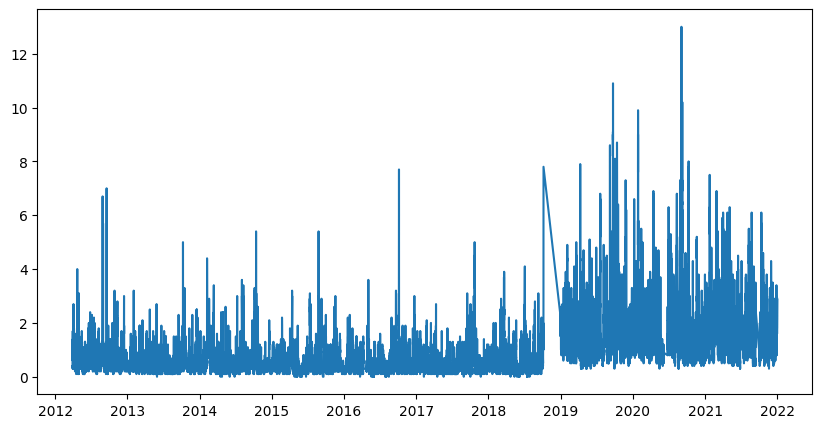

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5)) # 가로, 세로
plt.plot(df['MAX_WAVE'])
plt.show()

In [1]:
import pandas as pd
df = pd.read_csv('./2011_2021_2.csv')

In [3]:
df[df['특보강도']==1].head(20)

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
21,2012-03-30 09:00:00,8.4,20.7,1.0,1.5,1016.1,1.0
22,2012-03-30 10:00:00,9.0,20.7,1.1,1.7,1015.3,1.0
23,2012-03-30 11:00:00,7.0,20.7,0.8,1.3,1015.0,1.0
24,2012-03-30 12:00:00,6.3,20.7,0.9,1.4,1013.9,1.0
25,2012-03-30 13:00:00,7.3,20.7,0.9,1.4,1013.1,1.0
26,2012-03-30 14:00:00,7.9,20.7,0.8,1.3,1011.9,1.0
27,2012-03-30 15:00:00,8.3,20.7,0.9,1.4,1011.3,1.0
28,2012-03-30 16:00:00,9.7,21.8,1.0,1.5,1010.5,1.0
29,2012-03-30 17:00:00,8.0,21.8,1.0,1.6,1010.7,1.0
30,2012-03-30 18:00:00,5.4,21.8,0.9,1.4,1010.9,1.0
